# Preparing a labeled image dataset for training using fastdup V1.0

In [ ]:
# download fastdup
!pip install pip -U
!pip install fastdup
!pip install pandas
!pip install wurlitzer
%load_ext wurlitzer

In [1]:
import fastdup
import pandas as pd

# Download Data

In [2]:
# download and extract imagenette
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz
!tar -xf imagenette2-160.tgz

--2023-03-01 09:56:48--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.220.216, 54.231.236.128, 52.217.83.86, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.220.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99003388 (94M) [application/x-tar]
Saving to: ‘imagenette2-160.tgz’

imagenette2-160.tgz 100%[===================>]  94.42M  31.5MB/s    in 3.0s    

2023-03-01 09:56:51 (31.5 MB/s) - ‘imagenette2-160.tgz’ saved [99003388/99003388]



In [2]:
data_dir = 'imagenette2-160/'
csv_path = 'imagenette2-160/noisy_imagenette.csv'

# Load and Format Annotations

In [3]:
label_map = {
    'n02979186': 'cassette_player', 
    'n03417042': 'garbage_truck', 
    'n01440764': 'tench', 
    'n02102040': 'English_springer', 
    'n03028079': 'church',
    'n03888257': 'parachute', 
    'n03394916': 'French_horn', 
    'n03000684': 'chain_saw', 
    'n03445777': 'golf_ball', 
    'n03425413': 'gas_pump'
}

In [4]:
# load raw annotations
df_annot = pd.read_csv(csv_path)
df_annot.head(3)

,path,noisy_labels_0,noisy_labels_1,noisy_labels_5,noisy_labels_25,noisy_labels_50,is_valid
0,train/n02979186/n02979186_9036.JPEG,n02979186,n02979186,n02979186,n02979186,n02979186,False
1,train/n02979186/n02979186_11957.JPEG,n02979186,n02979186,n02979186,n02979186,n03000684,False
2,train/n02979186/n02979186_9715.JPEG,n02979186,n02979186,n02979186,n03417042,n03000684,False


In [5]:
# change raw format to fastdup's format

# take relevant columns
df_annot = df_annot[['path', 'noisy_labels_0']]

# rename columns to fastdup's column names
df_annot = df_annot.rename({'noisy_labels_0': 'label', 'path': 'img_filename'}, axis='columns')

# create split column
df_annot['split'] = df_annot['img_filename'].apply(lambda x: x.split("/")[0])

# map label ids to regular labels
df_annot['label'] = df_annot['label'].map(label_map)

# show formated annotations
df_annot

,img_filename,label,split
0,train/n02979186/n02979186_9036.JPEG,cassette_player,train
1,train/n02979186/n02979186_11957.JPEG,cassette_player,train
2,train/n02979186/n02979186_9715.JPEG,cassette_player,train
3,train/n02979186/n02979186_21736.JPEG,cassette_player,train
4,train/n02979186/ILSVRC2012_val_00046953.JPEG,cassette_player,train
...,...,...,...
13389,val/n03425413/n03425413_17521.JPEG,gas_pump,val
13390,val/n03425413/n03425413_20711.JPEG,gas_pump,val
13391,val/n03425413/n03425413_19050.JPEG,gas_pump,val
13392,val/n03425413/n03425413_13831.JPEG,gas_pump,val


# Run Fastdup

In [6]:
work_dir = 'fastdup_imagenette'

# run fastdup with annotations
fd = fastdup.create(work_dir=work_dir, input_dir=data_dir) 
fd.run(annotations=df_annot, ccthreshold=0.9, threshold=0.8)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.

 ########################################################################################

Dataset Analysis Summary: 

    Dataset contains 13394 images
    Valid images are 100.00% (13,394) of the data, invalid are 0.00% (0) of the data
    Similarity:  2.73% (366) belong to 20 similarity clusters (components).
    97.27% (13,028) images do not belong to any similarity cluster.
    Largest cluster has 40 (0.30%) images.
    For a detailed analysis, use `.connected_components()`
(similarity threshold used is 0.8, connected component threshold used is 0.9).

    Outliers: 6.20% (830) of images are possible outliers, and fall in the bottom 5.00% of similarity values.
    For a detailed list of outliers, use `.outliers(data=True)`.


In [8]:
# show outliers image data
fd.outliers().head(5)

,index,outlier,nearest,distance,img_filename_outlier,label_outlier,split_outlier,error_code_outlier,is_valid_outlier,img_filename_nearest,label_nearest,split_nearest,error_code_nearest,is_valid_nearest
0,1338,12009,1757,0.469904,val/n03417042/n03417042_29412.JPEG,garbage_truck,val,VALID,True,train/n02102040/n02102040_7256.JPEG,English_springer,train,VALID,True
1,1336,2664,9763,0.476124,train/n02979186/n02979186_3967.JPEG,cassette_player,train,VALID,True,val/n01440764/n01440764_710.JPEG,tench,val,VALID,True
2,1335,2727,1571,0.476313,train/n02979186/n02979186_5424.JPEG,cassette_player,train,VALID,True,train/n02102040/n02102040_536.JPEG,English_springer,train,VALID,True
3,1333,12172,1817,0.479290,val/n03417042/n03417042_91.JPEG,garbage_truck,val,VALID,True,train/n02102040/n02102040_7868.JPEG,English_springer,train,VALID,True
4,1332,1981,10098,0.479516,train/n02979186/n02979186_10387.JPEG,cassette_player,train,VALID,True,val/n02102040/n02102040_5272.JPEG,English_springer,val,VALID,True


100%|██████████| 20/20 [00:00<00:00, 5950.21it/s]

fastdup_imagenette/galleries/outliers_20230301104213/imagenette2-160_val_n03417042_n03417042_29412_12009.JPEG.jpg
fastdup_imagenette/galleries/outliers_20230301104213/imagenette2-160_train_n02979186_n02979186_3967_2664.JPEG.jpg
fastdup_imagenette/galleries/outliers_20230301104213/imagenette2-160_train_n02979186_n02979186_5424_2727.JPEG.jpg
fastdup_imagenette/galleries/outliers_20230301104213/imagenette2-160_val_n03417042_n03417042_91_12172.JPEG.jpg
fastdup_imagenette/galleries/outliers_20230301104213/imagenette2-160_train_n02979186_n02979186_10387_1981.JPEG.jpg
fastdup_imagenette/galleries/outliers_20230301104213/imagenette2-160_train_n02979186_n02979186_27494_2571.JPEG.jpg
fastdup_imagenette/galleries/outliers_20230301104213/imagenette2-160_val_n03417042_n03417042_7422_12131.JPEG.jpg
fastdup_imagenette/galleries/outliers_20230301104213/imagenette2-160_val_n02979186_n02979186_442_10521.JPEG.jpg
fastdup_imagenette/galleries/outliers_20230301104213/imagenette2-160_train_n02979186_n029791

Stored outliers visual view in  fastdup_imagenette/galleries/outliers_20230301104213/outliers.html



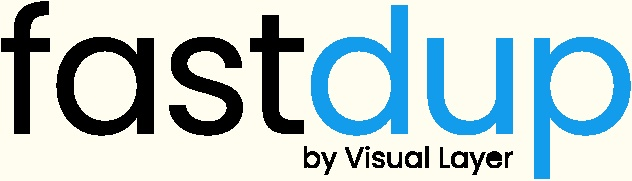
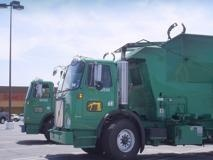
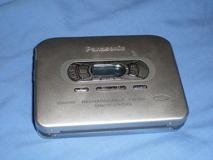
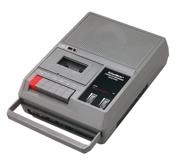
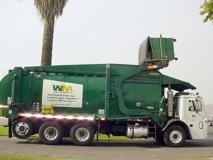
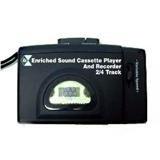
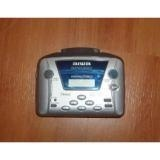
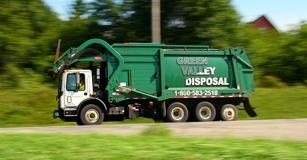
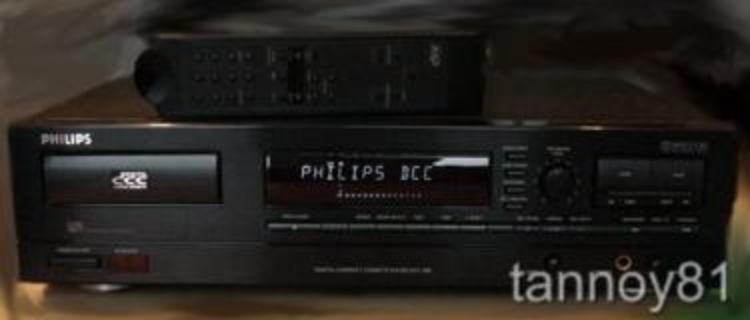
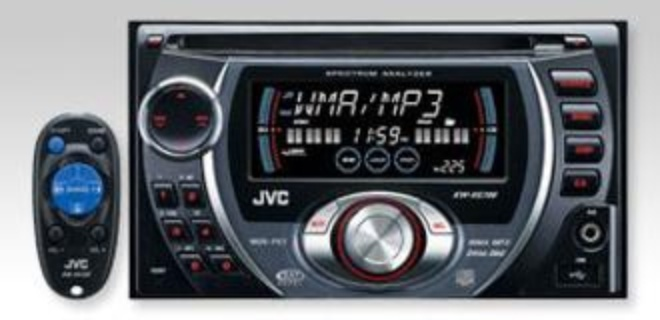
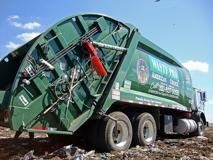
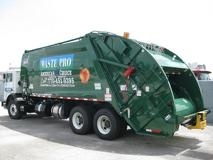
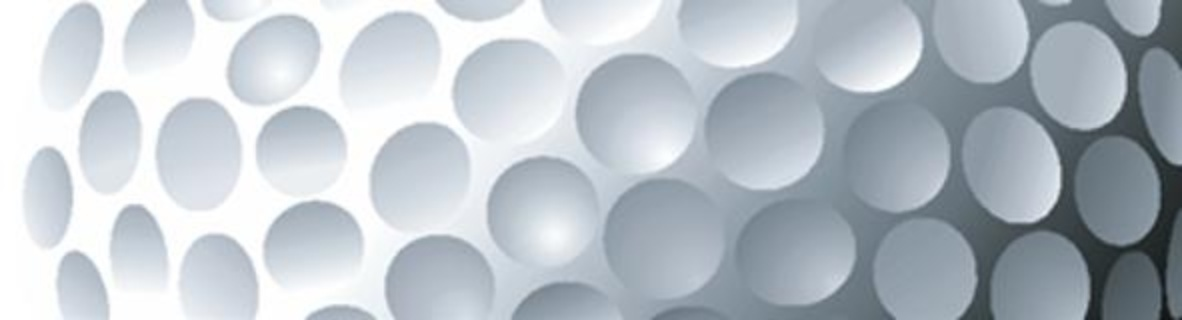
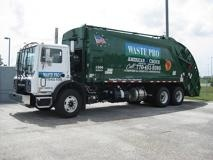
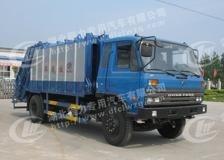
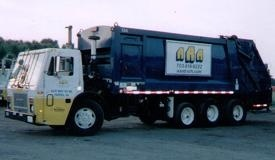
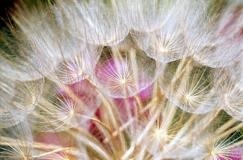
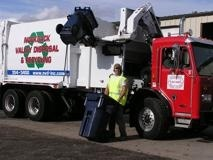
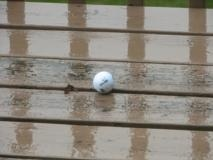
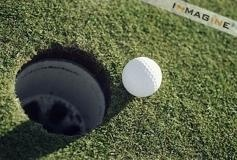
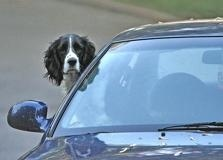

In [9]:
# visualize outliers
fd.vis.outliers_gallery()

In [10]:
# show similar image pairs
fd.similarity().head(5)

,from,to,distance,img_filename_from,label_from,split_from,error_code_from,is_valid_from,img_filename_to,label_to,split_to,error_code_to,is_valid_to
0,11521,5390,0.968786,val/n03394916/n03394916_30631.JPEG,French_horn,val,VALID,True,train/n03394916/n03394916_44127.JPEG,French_horn,train,VALID,True
1,5390,11521,0.968786,train/n03394916/n03394916_44127.JPEG,French_horn,train,VALID,True,val/n03394916/n03394916_30631.JPEG,French_horn,val,VALID,True
2,12914,7715,0.962458,val/n03445777/n03445777_6882.JPEG,golf_ball,val,VALID,True,train/n03445777/n03445777_13918.JPEG,golf_ball,train,VALID,True
3,7715,12914,0.962458,train/n03445777/n03445777_13918.JPEG,golf_ball,train,VALID,True,val/n03445777/n03445777_6882.JPEG,golf_ball,val,VALID,True
4,1117,1404,0.953837,train/n02102040/n02102040_1564.JPEG,English_springer,train,VALID,True,train/n02102040/n02102040_3837.JPEG,English_springer,train,VALID,True


In [11]:
# visualize clusters
fd.vis.component_gallery(max_width=800)

Output hidden; open in https://colab.research.google.com to view.

In [12]:
# visualize clusters with specific labels
fd.vis.component_gallery(max_width=800, slice='chain_saw')

Output hidden; open in https://colab.research.google.com to view.

In [13]:
# show connected components
cc_df, _ = fd.connected_components()
cc_df.sort_values('count', ascending=False).head(5)

,fastdup_id,component_id,sum,count,mean_distance,min_distance,max_distance,img_filename,label,split,error_code,is_valid
7778,7778,7332,36.6734,40.0,0.9168,0.9011,0.9328,train/n03445777/n03445777_16186.JPEG,golf_ball,train,VALID,True
7990,7990,7332,36.6734,40.0,0.9168,0.9011,0.9328,train/n03445777/n03445777_3503.JPEG,golf_ball,train,VALID,True
682,682,36,36.5815,40.0,0.9145,0.9003,0.9339,train/n01440764/n01440764_6159.JPEG,tench,train,VALID,True
9545,9545,36,36.5815,40.0,0.9145,0.9003,0.9339,val/n01440764/n01440764_12250.JPEG,tench,val,VALID,True
7651,7651,7332,36.6734,40.0,0.9168,0.9011,0.9328,train/n03445777/n03445777_11389.JPEG,golf_ball,train,VALID,True


In [14]:
# getting metadata for individual images using their 'fastdup_id' available in fd.annotations()
fd[349]

{'img_filename': 'train/n01440764/n01440764_17789.JPEG',
 'label': 'tench',
 'split': 'train',
 'fastdup_id': 349,
 'error_code': 'VALID',
 'is_valid': True}